# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm
import scipy.stats
import seaborn as sns
%matplotlib inline
df = pd.read_csv('data/human_body_temperature.csv')

In [68]:
# Your work here.
df= pd.DataFrame(df)

In [69]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68
1,98.4,F,81
2,97.8,M,73
3,99.2,F,66
4,98.0,F,73


# Is the distribution of body temperatures normal? 

In [70]:
df.temperature.describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

In [71]:
temp=df.temperature.sort_values()

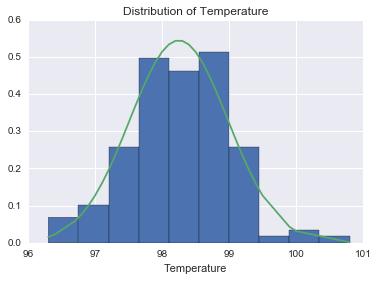

In [72]:
mean, sta_dr = temp.mean(),temp.std()
p=norm.pdf(temp,mean,sta_dr)
plt.hist(temp,10,normed=True,stacked=True)
plt.plot(temp, p)
plt.xlabel('Temperature')
plt.title('Distribution of Temperature')
plt.show()

In [73]:
p=scipy.stats.normaltest(temp)
print(p)

NormaltestResult(statistic=2.7038014333192359, pvalue=0.25874798634882118)


because p value > 0.05  so it is normal distribution 

# Is the sample size large? Are the observations independent? 

In [74]:
len(df)

130

it is a large sample size and the observations are independent, because it measure different person every time.

# Is the true population mean really 98.6 degrees F? 

H1: the population mean is not 98.6 degrees F; 
H0:the population mean is 98.6 degrees F

In [75]:
mean, sta_dr
size=len(df.temperature)

signal=mean-98.6
noise=sta_dr/(size**0.5)
z_val=signal/noise
z_val

-5.4548232923640771

assume that the mean is 98.6 degrees F

In [76]:
stats.stats.ttest_1samp(df['temperature'], popmean=98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

because P_value<0.05, so the H0 is not  true and the population mean is not 98.6 degrees F.

two-sample test : two tails(male, female)

In [77]:
female = df[df['gender'] == 'F']
male = df[df['gender'] == 'M']

In [78]:
stats.ttest_ind(female['temperature'],male['temperature'])

Ttest_indResult(statistic=2.2854345381656103, pvalue=0.023931883122395609)

p_value is still lower than 0.05,so H0 is not true.

# At what temperature should we consider someone's temperature to be "abnormal"? 

In [79]:
sta_dr

0.73318315803894563

In [80]:
CI_upper = mean + (sta_dr* 2)
CI_lower = mean - (sta_dr * 2)

In [81]:
print('the temperature consider abnormal between:',CI_upper,CI_lower)

('the temperature consider abnormal between:', 99.715597085308673, 96.782864453152882)


# Is there a significant difference between males and females in normal temperature? 


H0: male and female are no different significantly in normal temperature,
H1: male and female are different significantly in normal temperature 

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)

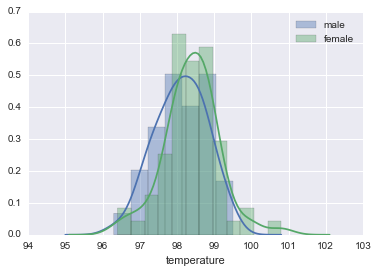

In [82]:
temp_gender=df[['gender','temperature']]
female_temp = temp_gender[temp_gender['gender'] == 'F']
male_temp = temp_gender[temp_gender['gender'] == 'M']
sns.distplot(male_temp['temperature'], label='male')
sns.distplot(female_temp['temperature'], label='female')
plt.legend()
stats.ttest_ind(male_temp['temperature'],female_temp['temperature'])

because p<0.05 so male and female are differnet significantly in normal temperature(two samples test)